In [3]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import io
import webuiapi

import csv

# 画像を読み込む下準備-------------------------------------------------------------------------------

# WFLWのアノテーションデータの読み込み
annotation_data_path = "/root/dataset/WFLW/WFLW_annotations/list_98pt_rect_attr_train_test/list_98pt_rect_attr_train.txt"
WFLW_images = "/root/dataset/WFLW/WFLW_images"

# 生成したデータの保存先 画像&csv
image_save_path = "/root/dataset/generated_images_dataset/image"
annotation_save_path = "/root/dataset/generated_images_dataset/annotations"

# CSVの読み込みとリスト化
anotation_data_lists = [] # 画像データと座標データがまとめられたリスト
with open(annotation_data_path) as f:
    anotation_data = f.readlines()

for i in anotation_data:
    anotation_data_lists.append(i.split(" "))

# stable diffsuion web APIの用意
api = webuiapi.WebUIApi(host='192.168.0.50', port=7860)
# anotation_data_lists

orig_image_size_x,orig_image_size_y 1024 1024
input_control_image_size (512, 512)
black_image.size (512, 512)


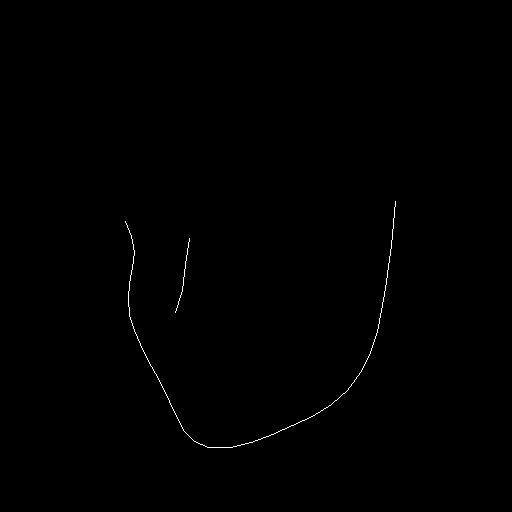

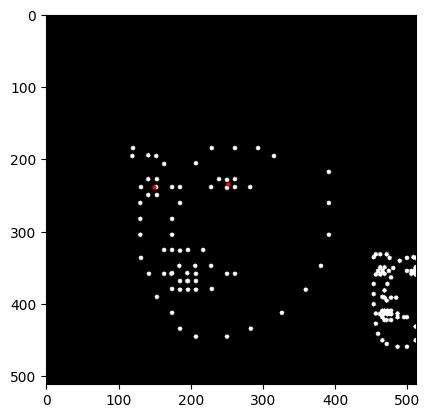

[125.62179199999999, 221.6640129361702, 131.44329872340424, 236.47376817021276, 134.4488435744681, 252.06086468085107, 132.6188064680851, 267.8126645106383, 129.33806774468084, 283.38092051063825, 128.34629378723406, 299.2554825531915, 129.93917480851064, 315.0694005106383, 134.6221385531915, 330.26512817021273, 140.99068459574465, 344.8518270638298, 147.94033225531913, 359.1739676595745, 155.24949038297873, 373.31567046808516, 162.8031741276596, 387.3289239148936, 169.90865021276596, 401.5708711489362, 176.09156629787233, 416.2400571914893, 183.23297702127658, 430.442848, 194.2682764255319, 441.7723281702127, 208.85747131914894, 447.8618914042553, 230.71690621276593, 447.7579261276596, 251.98900017021273, 442.2865239148936, 272.51787097872335, 434.43639012765954, 292.74358672340423, 425.82238638297866, 312.57977531914895, 416.356405787234, 331.2447496170213, 404.77833531914894, 347.5217164255319, 390.0605848510638, 360.58552646808505, 372.4179887659574, 370.37344340425534, 352.7612575

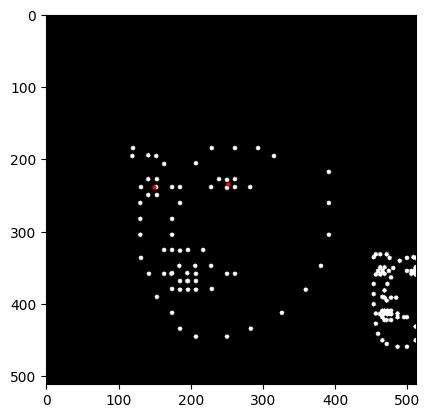

[125.62179199999999, 221.6640129361702, 131.44329872340424, 236.47376817021276, 134.4488435744681, 252.06086468085107, 132.6188064680851, 267.8126645106383, 129.33806774468084, 283.38092051063825, 128.34629378723406, 299.2554825531915, 129.93917480851064, 315.0694005106383, 134.6221385531915, 330.26512817021273, 140.99068459574465, 344.8518270638298, 147.94033225531913, 359.1739676595745, 155.24949038297873, 373.31567046808516, 162.8031741276596, 387.3289239148936, 169.90865021276596, 401.5708711489362, 176.09156629787233, 416.2400571914893, 183.23297702127658, 430.442848, 194.2682764255319, 441.7723281702127, 208.85747131914894, 447.8618914042553, 230.71690621276593, 447.7579261276596, 251.98900017021273, 442.2865239148936, 272.51787097872335, 434.43639012765954, 292.74358672340423, 425.82238638297866, 312.57977531914895, 416.356405787234, 331.2447496170213, 404.77833531914894, 347.5217164255319, 390.0605848510638, 360.58552646808505, 372.4179887659574, 370.37344340425534, 352.7612575

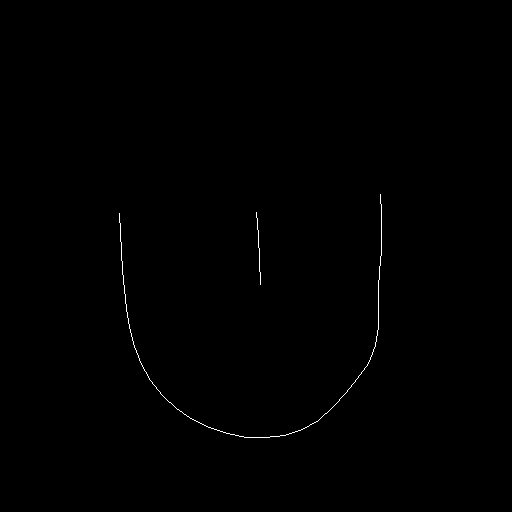

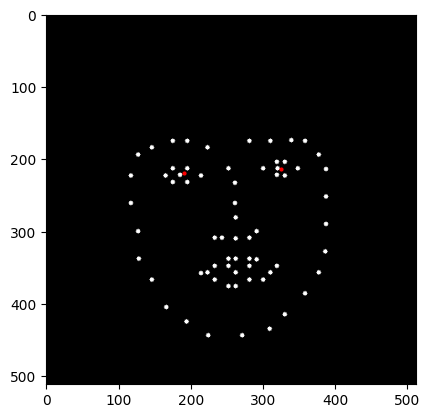

[119.15534380246902, 213.59250646913577, 120.22845629629617, 232.6776462222222, 121.35772444444447, 251.75953066666665, 122.59702518518513, 270.8345663209877, 124.04117649382704, 289.8949357037037, 126.07669570370372, 308.8999442962963, 129.224375308642, 327.74988483950614, 134.03694143209873, 346.24027970370366, 141.06194330864196, 364.00115041975306, 150.66066646913566, 380.5098477037037, 162.62573985185188, 395.3954291358025, 176.58406399999996, 408.43227654320987, 192.23358893827165, 419.38079130864196, 209.29598419753083, 427.96098528395066, 227.42969837037032, 433.9533779753086, 246.24420977777777, 437.2319115061729, 265.3361303703703, 437.7027034074074, 284.12475417283946, 435.2910680493827, 302.1671284938272, 429.56603891358014, 318.501813728395, 420.009397728395, 332.7142573827161, 407.4847225679013, 345.4380152098765, 393.42959565432096, 357.4107038024691, 378.7270494814815, 368.0508112592592, 363.0485902222222, 375.4650974814815, 345.64768395061725, 378.34514014814806, 326.9

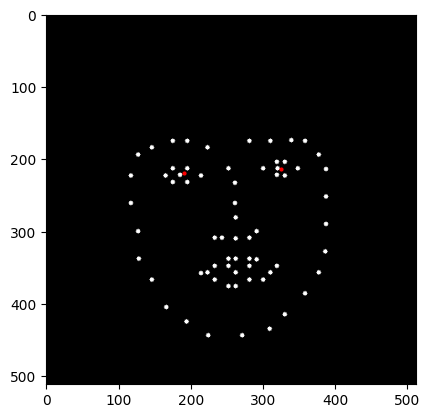

[119.15534380246902, 213.59250646913577, 120.22845629629617, 232.6776462222222, 121.35772444444447, 251.75953066666665, 122.59702518518513, 270.8345663209877, 124.04117649382704, 289.8949357037037, 126.07669570370372, 308.8999442962963, 129.224375308642, 327.74988483950614, 134.03694143209873, 346.24027970370366, 141.06194330864196, 364.00115041975306, 150.66066646913566, 380.5098477037037, 162.62573985185188, 395.3954291358025, 176.58406399999996, 408.43227654320987, 192.23358893827165, 419.38079130864196, 209.29598419753083, 427.96098528395066, 227.42969837037032, 433.9533779753086, 246.24420977777777, 437.2319115061729, 265.3361303703703, 437.7027034074074, 284.12475417283946, 435.2910680493827, 302.1671284938272, 429.56603891358014, 318.501813728395, 420.009397728395, 332.7142573827161, 407.4847225679013, 345.4380152098765, 393.42959565432096, 357.4107038024691, 378.7270494814815, 368.0508112592592, 363.0485902222222, 375.4650974814815, 345.64768395061725, 378.34514014814806, 326.9

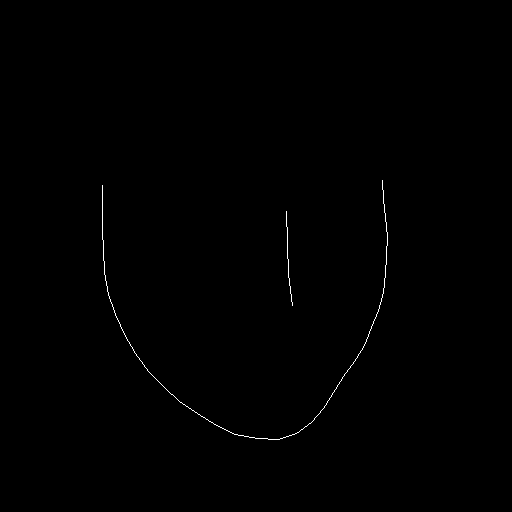

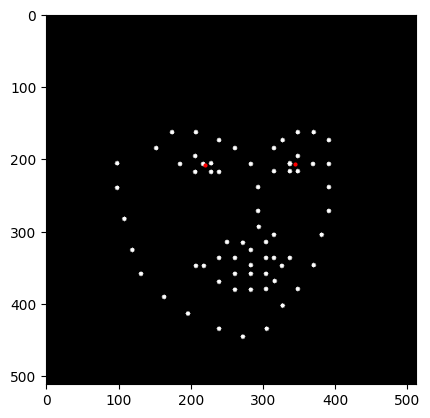

[102.2787469473684, 185.36925810526313, 102.61964126315787, 207.18753852631576, 102.72517557894733, 229.0081936842105, 103.00370189473682, 250.82626863157896, 104.64099705263159, 272.5786829473684, 108.59386610526316, 294.02435031578943, 115.35106863157895, 314.7547654736842, 124.42022400000003, 334.5939789473684, 135.24548547368417, 353.53025515789466, 148.16769515789474, 371.0950635789473, 163.16721347368417, 386.9260581052631, 179.7590096842105, 401.0862416842105, 197.49588884210524, 413.7881212631579, 216.03641094736844, 425.28824084210527, 235.71120842105256, 434.6234307368422, 257.08668126315786, 438.8700631578948, 278.8239646315789, 439.3548345263158, 296.4998602105263, 433.43369768421053, 311.4624336842105, 422.2374938947369, 323.76263410526315, 408.1439562105263, 333.4746391578947, 392.1270821052631, 343.5174096842105, 376.3145616842105, 354.6941962105263, 361.27575915789475, 364.08298105263157, 345.0901658947368, 371.3226138947368, 327.811264, 378.03558063157897, 310.31661810

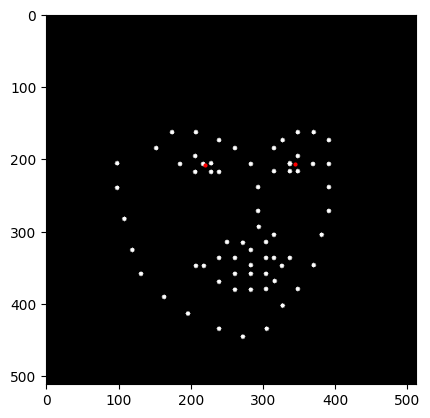

[102.2787469473684, 185.36925810526313, 102.61964126315787, 207.18753852631576, 102.72517557894733, 229.0081936842105, 103.00370189473682, 250.82626863157896, 104.64099705263159, 272.5786829473684, 108.59386610526316, 294.02435031578943, 115.35106863157895, 314.7547654736842, 124.42022400000003, 334.5939789473684, 135.24548547368417, 353.53025515789466, 148.16769515789474, 371.0950635789473, 163.16721347368417, 386.9260581052631, 179.7590096842105, 401.0862416842105, 197.49588884210524, 413.7881212631579, 216.03641094736844, 425.28824084210527, 235.71120842105256, 434.6234307368422, 257.08668126315786, 438.8700631578948, 278.8239646315789, 439.3548345263158, 296.4998602105263, 433.43369768421053, 311.4624336842105, 422.2374938947369, 323.76263410526315, 408.1439562105263, 333.4746391578947, 392.1270821052631, 343.5174096842105, 376.3145616842105, 354.6941962105263, 361.27575915789475, 364.08298105263157, 345.0901658947368, 371.3226138947368, 327.811264, 378.03558063157897, 310.31661810

In [4]:
# パラメータ類----------------------------------------------------------------------------------------
load_image_num = range(3) # csvの列ナンバー
# 画像のクロップマージンの画像サイズに対する割合
mergin_per = 0.2
input_control_image_size = (512,512)
# プロンプトの用意&生成画像サイズ
prompts = [
    "short hair,quality, eyes, best, winning, detailed, face,  Masterpiece, Award, Quality, solo, quality,1girl, masterpiece, anime,Anime,(perfect anime illustration),kawaii,Kawaii",
    "quality,Boy, eyes, best, winning, detailed, face,  Masterpiece, Award, Quality, solo, quality,1boy, masterpiece, anime,Anime,(perfect anime illustration),boy"
]
negative_prompt = ""
generate_image_size = (512,512)
# Unitの重みの設定
unit1_weight = 1.0
unit2_weight = 1.6

for image_num in load_image_num:

    # 入力データの加工--------------------------------------------------------------------------------------
    image_name = anotation_data_lists[image_num][-1].replace("\n","")
    image_path = WFLW_images + "/" + image_name
    image = Image.open(image_path)
    orig_image_size_x,orig_image_size_y = image.size #オリジナルの画像データのサイズ（ランドマークの座標変換のときに使う）
    print("orig_image_size_x,orig_image_size_y",orig_image_size_x,orig_image_size_y)
    bounding_box_data = tuple([int(bdbox) for bdbox in anotation_data_lists[image_num][-11:-7]])
    face_width = bounding_box_data[2]-bounding_box_data[0]
    face_height = bounding_box_data[3]-bounding_box_data[1]
    
    #顔の中心座標
    face_center_x = float((bounding_box_data[2]+bounding_box_data[0]) / 2)
    face_center_y = float((bounding_box_data[3]+bounding_box_data[1]) / 2)

    # コントロールネット用の画像のクロップとリサイズ
    margin_pix = float((face_width+face_height) / 2 * mergin_per)
    half_long_side = max(face_width,face_height) / 2
    image_size = margin_pix + half_long_side
    crop_coordinates = (
        face_center_x-image_size,
        face_center_y-image_size,
        face_center_x+image_size,
        face_center_y+image_size
    )
    
    input_control_image = image.crop(crop_coordinates)
    croped_image_size_x,croped_image_size_y = input_control_image.size
    input_control_image = input_control_image.resize(input_control_image_size)
    print("input_control_image_size",input_control_image.size)
    # input_control_image.show() # controlnet input用の画像の表示#################################
    
    #scribble用の白黒画像の作成と表示---------------------------------------------------------------------------------
    black_image = Image.new('RGB', input_control_image.size, "black")
    draw = ImageDraw.Draw(black_image)
    
    orig_landmark_coordinates = anotation_data_lists[image_num][0:196]
    transformed_coordinates_scribble = []
    for landmark_num in range(0, len(orig_landmark_coordinates),2):  
        transformed_x = (float(orig_landmark_coordinates[landmark_num])-crop_coordinates[0]) * (input_control_image_size[0] / croped_image_size_x)
        transformed_y = (float(orig_landmark_coordinates[landmark_num+1])-crop_coordinates[1]) * (input_control_image_size[1] / croped_image_size_y)
        transformed_coordinates_scribble.append((transformed_x,transformed_y))
        
    # 使用する点と線の表示
    draw.line(transformed_coordinates_scribble[0:33], fill="white",width=1) # 輪郭
    # draw.line(transformed_coordinates_scribble[33:38], fill="white",width=1) # 左眉
    # draw.line(transformed_coordinates_scribble[42:47], fill="white",width=1) # 右眉
    draw.line(transformed_coordinates_scribble[51:55], fill="white",width=1) # 鼻筋
    # draw.line(transformed_coordinates_scribble[55:60], fill="white",width=1) # 鼻下
    # draw.line(transformed_coordinates_scribble[88:96], fill="white",width=1) # 口
    # draw.line([transformed_coordinates_scribble[88],transformed_coordinates_scribble[95]], fill="white",width=1) # 口
    print("black_image.size",black_image.size)
    black_image.show()
    
    # イラスト生成用のコード------------------------------------------------------------------------------

    # 生成画像のランドマーク用意
    genimage_keypoints_x = [keypoint[0]*(generate_image_size[0] / input_control_image_size[0]) for keypoint in transformed_coordinates_scribble]
    genimage_keypoints_y = [keypoint[1]*(generate_image_size[1] / input_control_image_size[1]) for keypoint in transformed_coordinates_scribble]
    x_np = np.array(genimage_keypoints_x)
    y_np = np.array(genimage_keypoints_y)
    # print(x_np)
    # print(y_np)

    unit1 = webuiapi.ControlNetUnit(
        input_image=black_image,
        # module='black_image',
        model='control_v11p_sd15_scribble_fp16 [4e6af23e]',
        weight=unit1_weight
    )

    unit2 = webuiapi.ControlNetUnit(
        input_image=input_control_image,
        # input_image=black_image_openpose,
        module='openpose_faceonly',
        model='control_v11p_sd15_openpose [cab727d4]',
        weight=unit2_weight
    )
    # ig,ax = plt.subplots(1)
    r = api.controlnet_detect(images=[input_control_image], module='openpose_faceonly')
    # ax.imshow(r.image)

    for num,prompt in enumerate(prompts):
        # r = api.txt2img(
        #     prompt=prompt,
        #     negative_prompt=negative_prompt,
        #     width=generate_image_size[0],
        #     height=generate_image_size[1],
        #     steps=38,
        #     controlnet_units=[unit2,]
        # )       

        fig,ax = plt.subplots(1)
        ax.imshow(r.image)

        # 線を引く
        # plt.plot(x_np[0:33], y_np[0:33], 'o',color='red',markersize=2) # 輪郭
        # print(orig_landmark_coordinates[0:33])
        # plt.plot(x_np[33:38], y_np[33:38], 'o',color='red',markersize=2) # 上右眉
        # plt.plot(x_np[38:42], y_np[38:42], 'o',color='red',markersize=2) # 下右眉
        # plt.plot(x_np[42:47], y_np[42:47], 'o',color='red',markersize=2) # 上左眉
        # plt.plot(x_np[47:51], y_np[47:51], 'o',color='red',markersize=2) # 下左眉
        # plt.plot(x_np[51:55], y_np[51:55], 'o',color='red',markersize=2) # 鼻筋
        # plt.plot(x_np[55:60], y_np[55:60], 'o',color='red',markersize=2) # 鼻下
        # plt.plot(x_np[60:68], y_np[60:68], 'o',color='red',markersize=2) # 右目
        # plt.plot(x_np[68:76], y_np[68:76], 'o',color='red',markersize=2) # 左目
        # plt.plot(x_np[88:96], y_np[88:96], 'o',color='red',markersize=2) # 口
        plt.plot(x_np[96], y_np[96], 'o',color='red',markersize=2) # 右目の光彩
        plt.plot(x_np[97], y_np[97], 'o',color='red',markersize=2) # 右目の光彩
        # plt.plot([x_np[88],x_np[95]], [y_np[88],y_np[95]], 'o',color='red',markersize=2) # 口
        plt.show()
            
        # print(writting_annotation_coordinate_xy)
        # print(genimage_keypoints_x[keypoint])
        # print(genimage_keypoints_y[keypoint])
        
        # 画像とアノテーションデータの保存-------------------------------------------------------------------
        generate_coordinates_one_dimention = [""]
        for keypoint in range(98):
            generate_coordinates_one_dimention.append(genimage_keypoints_x[keypoint])
            generate_coordinates_one_dimention.append(genimage_keypoints_y[keypoint])
        print(generate_coordinates_one_dimention)
        # 生成された画像の保存
        # r.image.save(f"{image_save_path}/{image_file_name}_{num}.jpg")
        # アノテーションデータの保存
        # facial_contours = [facial_contours[0:33]]
        # upper_right_eyebrow = [facial_contours[0:33]]